In [1]:
import pandas as pd
import numpy as np
import os
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.io import wavfile

In [2]:
emotion_df = pd.read_csv("../speech_emotion_reco/data/merged_dataset.csv")

In [3]:
emotion_df.shape

(12163, 5)

In [4]:
emotion_df.shape[0]*4

48652

In [5]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [18]:
def saving_image(path, image_id):
    data, sample_rate = librosa.load(path, sr=44100)
    
    noise_data = noise(data)
    stretch_data = stretch(data)
    pitch_data = pitch(data, sample_rate)
    shift_data = shift(data)
    
    samples = {"noise": noise_data, "stretch": stretch_data, "pitch": pitch_data, "shift": shift_data}
    
    for key,value in samples.items():
        fig = plt.figure
        sgram = librosa.stft(value)
        sgram_mag, _ = librosa.magphase(sgram)
        sample_rate = 44100
        mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
        mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
        librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
        filename = "../speech_emotion_reco/data/images_augmented/" + key + "_" + image_id
        plt.axis('off')
        image = plt.savefig(filename,bbox_inches='tight',transparent=True, pad_inches=0)
        plt.close()
        return image

In [19]:
tmp = saving_image(emotion_df.iloc[2946,3],str(emotion_df.iloc[2946,0]))

In [24]:
from PIL import Image
image = Image.open(tmp)

AttributeError: 'NoneType' object has no attribute 'read'

In [40]:
def convert_to_image(audio_file):
    data, sample_rate = librosa.load(audio_file, sr=44100)
    fig = plt.figure
    sgram = librosa.stft(data)
    sgram_mag, _ = librosa.magphase(sgram)
    sample_rate = 44100
    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
    mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
    librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
    plt.axis('off') 
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    image = Image.open(buf)
    return image

In [41]:
import io
from PIL import Image
import matplotlib.pyplot as plt

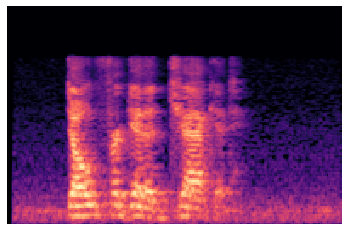

In [42]:
image = convert_to_image("../speech_emotion_reco/data/crema/1001_DFA_ANG_XX.wav")

In [43]:
image.show()